## Navigation

Step 1. Loading dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from unityagents import UnityEnvironment

from agent import Agent
from utils import run
%matplotlib inline

Step 2. Instantiating the Unity Environment

Please set the file_name below to the installation of the Banana Unity environment.

In [2]:
env = UnityEnvironment(file_name="...")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Retrieving the brain name to use to manipulate the agent inside Unity.

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Quick overview of the environment's dimensions

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


Step 3. Instantiating the Agent

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, seed=42)

Step 4. Training the Agent

Episode 100	Average Score: 2.63
Episode 200	Average Score: 5.99
Episode 300	Average Score: 8.53
Episode 400	Average Score: 11.64
Episode 447	Average Score: 13.03
Environment solved in 347 episodes!	Average Score: 13.03


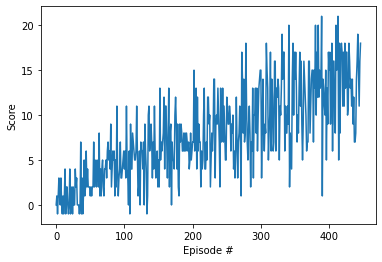

In [6]:
scores = run(env, agent, train_mode=True)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Step 5. Running the agent from the stored weights

Loading the weights on the CPU

In [7]:
device = torch.device('cpu')
agent.qnetwork_local.load_state_dict(torch.load("model.pth", map_location=device))

Step 6. Running the agent inside the environment for 1 episode

In [8]:
run(env, agent, n_episodes=1, eps_start=0.0, eps_end=0.0, train_mode=False)

Episode 1	Average Score: 17.00

[17.0]

In [9]:
env.close()